In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from quantumcatch import System
import numpy as np
import markovanalyzer as ma
import re
from quantumcatch.fitting_tools import FitSystem
from qutip import *
import pickle
from signalsnap import SpectrumCalculator, SpectrumConfig, PlotConfig
import numpy as np
import pandas as pd

def pickle_load(path):
    f = open(path, mode='rb')
    obj = pickle.load(f)
    f.close()
    return obj

# Calculate Polyspectra of Singple Photon Clicks

In [3]:
def import_time_stamps(read_path):
    
    df = pd.read_csv(read_path, header=None)
    
    time_stamps = pd.DataFrame()
    time_stamps['t'] = 81 * (df.values[:,0] - df.values[0,0]) # [ps]
    
    return time_stamps['t'].values

path = 'example_data/timestamps_single_photon_two_state_blinking.dat'

time_stamps = import_time_stamps(path) / 1e9 # in ms

test = np.random.rand(time_stamps.shape[0])
d = 100
time_stamps = time_stamps[test < 1/d]

In [4]:
config = SpectrumConfig(data=time_stamps, f_unit='kHz', 
                        spectrum_size=201, order_in='all', m=40, m_stationarity=None,
                        f_max=5, backend='cpu',
                        interlaced_calculation=False)

spec5 = SpectrumCalculator(config)

In [5]:
f, s, serr = spec5.calc_spec_poisson(n_reps=5)

number of points: 201
delta f: 0.025


  0%|          | 0/226 [00:00<?, ?it/s]

number of points: 201
delta f: 0.025


  0%|          | 0/226 [00:00<?, ?it/s]

number of points: 201
delta f: 0.025


  0%|          | 0/226 [00:00<?, ?it/s]

number of points: 201
delta f: 0.025


  0%|          | 0/226 [00:00<?, ?it/s]

number of points: 201
delta f: 0.025


  0%|          | 0/226 [00:00<?, ?it/s]

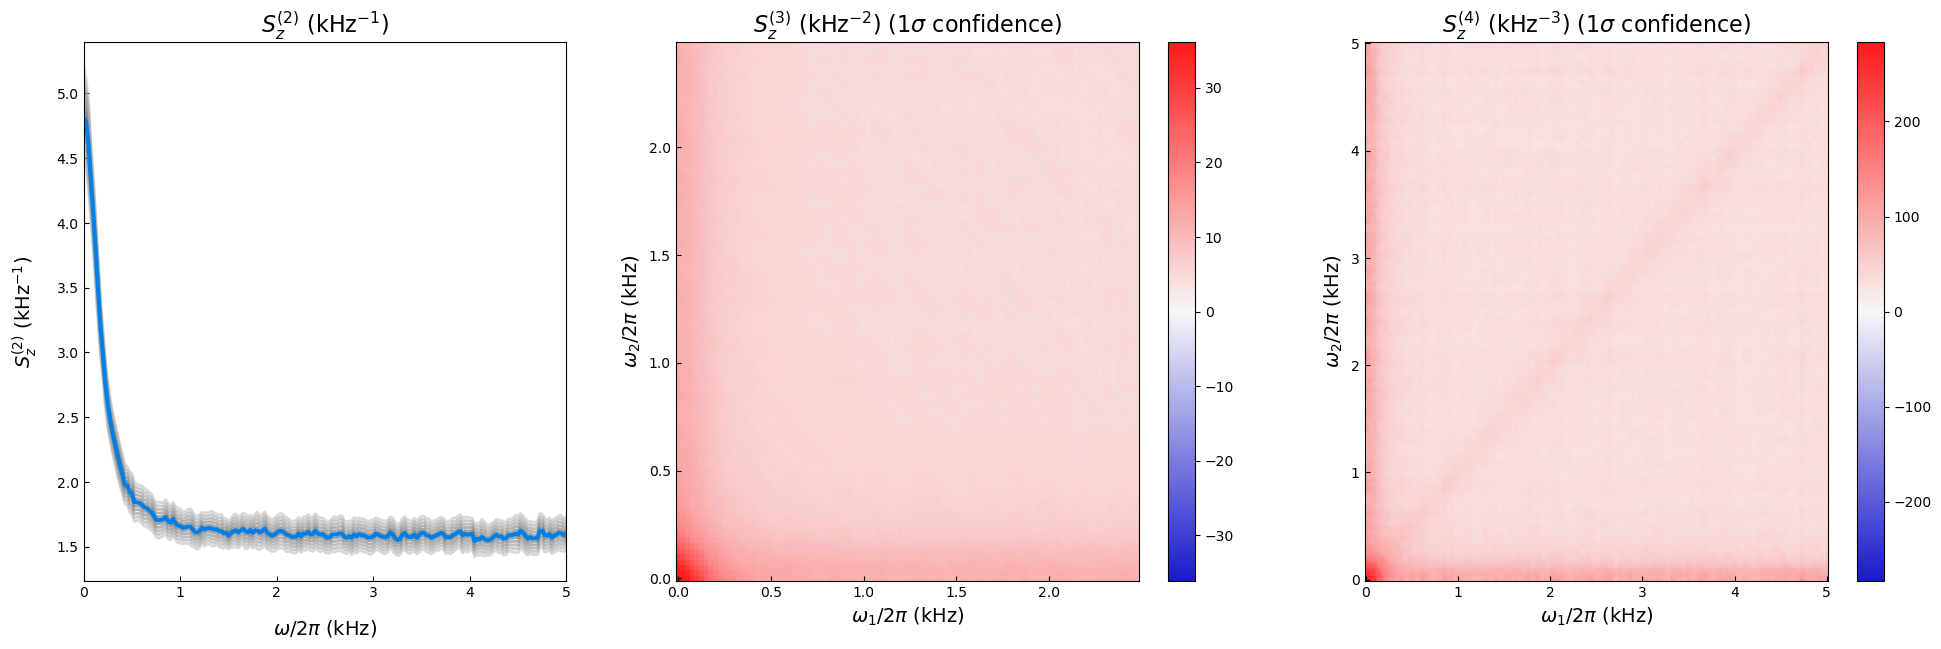

In [6]:
fig = spec5.plot()

In [7]:
spec5.save_spec('example_data/polyspectra_single_photon_two_state_blinking.pkl')

# Fit with MarkovAnalyzer

In [8]:
def model_system(params):
    
    rates = {'0->1': params['gamma_01'],
             '1->0': params['gamma_10']}
    
    return rates

emitting_states = [0, 1]

path_to_spectra = 'example_data/polyspectra_single_photon_two_state_blinking.pkl'

fit_obj = ma.SinglePhotonFit(model_system, emitting_states, path_to_spectra)

parameter = {'gamma_01': [0.277, 0, 0.5, True],
             'gamma_10': [0.791, 0, 1e0, True],
             'gamma_ph': [100, 0, 1e8, True]}

result = fit_obj.start_fitting(parameter, xtol=1e-8, ftol=1e-8, show_plot=True,
                                         fit_modus='resolution_based',
                                         fit_orders=(1, 2, 3))

Fitting at full resolution


In [9]:
result